In [1]:
import os
import time
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import GlobalAveragePooling2D, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# 1. Predict Image with Pre trained model InceptionV3

image shape :  (299, 299, 3)
image shape after expanding :  (1, 299, 299, 3)
image shape after preprocess :  (1, 299, 299, 3)


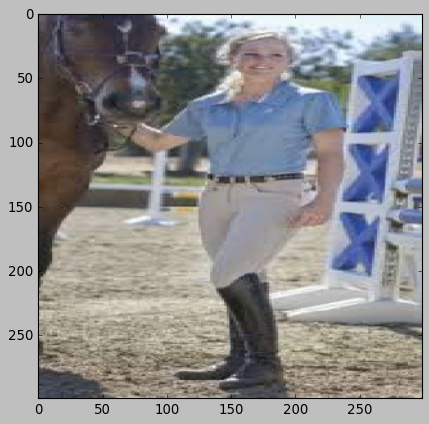

In [21]:
# Load and preprocess image
img_path = 'rider.jpg' # Original image shape : 163x310
img = image.load_img(img_path, target_size=(299, 299))

img_arr = image.img_to_array(img)
print('image shape : ', img_arr.shape)

img_arr = np.expand_dims(img_arr, axis=0)
print('image shape after expanding : ', img_arr.shape)

img_arr = preprocess_input(img_arr)
print('image shape after preprocess : ', img_arr.shape)

plt.imshow(img)

In [5]:
inceptionv3_model = InceptionV3(include_top=True, weights='imagenet')
inceptionv3_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [22]:
predictions = inceptionv3_model.predict(img_arr)
print('Predicted : ', decode_predictions(predictions))

Predicted :  [[('n04131690', 'saltshaker', 0.7573951), ('n01924916', 'flatworm', 0.21798462), ('n03950228', 'pitcher', 0.01980846), ('n06359193', 'web_site', 0.0028856436), ('n04522168', 'vase', 0.0019221725)]]


# 2. Train InceptionV3 Model with custom data (Fine Tuning)

In [7]:
# Loading the training data
PATH = os.getcwd() # returns current working directory

# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

print('Data Path : ', data_path)
print('Data Directory List : ', data_dir_list)

Data Path :  /Users/sumon/JypyterWorkspace/AMED Brain/data
Data Directory List :  ['dogs', 'cats', 'Humans', 'horses']


In [8]:
# Load all the images to data list
img_data_list = []

for dataset in data_dir_list:
    img_list = os.listdir(data_path +'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img
        img = image.load_img(img_path, target_size=(299, 299))
        img_arr = image.img_to_array(img)
        img_arr = np.expand_dims(img_arr, axis=0)
        img_arr = preprocess_input(img_arr)
        img_arr = img_arr/255
        
        print('Input image shape:', img_arr.shape)
        img_data_list.append(img_arr)

Loaded the images of dataset-dogs

Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 2

Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 

Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 

Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 299, 3)
Input image shape: (1, 299, 

In [9]:
img_data = np.array(img_data_list)
print(img_data.shape)

img_data = np.rollaxis(img_data, 1, 0)
print(img_data.shape)

img_data = img_data[0]
print(img_data.shape)

(808, 1, 299, 299, 3)
(1, 808, 299, 299, 3)
(808, 299, 299, 3)


In [10]:
# Define the number of classes
num_classes = 4
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:202] = 0
labels[202:404] = 1
labels[404:606] = 2
labels[606:] = 3

names = ['dogs','cats','humans','horses']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

# Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print('One-hot encoding : \n',Y)
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('Y_train : ', Y_train.shape)
print('Y_test : ', Y_test.shape)

One-hot encoding : 
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
X_train :  (646, 299, 299, 3)
X_test :  (162, 299, 299, 3)
Y_train :  (646, 4)
Y_test :  (162, 4)


In [12]:
image_input = Input(shape=(299, 299, 3))

model = InceptionV3(input_tensor=image_input, include_top=False, weights='imagenet')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 149, 149, 32) 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 149, 149, 32) 0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

In [13]:
# custom_inceptionv3_model : Training the classifier and feature extraction

last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)

# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)

# a softmax layer for 4 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

custom_inception_model = Model(image_input, out)
custom_inception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 149, 149, 32) 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 149, 149, 32) 0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

In [14]:
# freeze all the layers except the dense layers
for layer in custom_inception_model.layers[:-6]:
    layer.trainable = False

custom_inception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 149, 149, 32) 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 149, 149, 32) 0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

In [15]:
# Fit the custom model
t = time.time()
custom_inception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = custom_inception_model.fit(X_train, Y_train, batch_size=32, epochs=6, verbose=1, validation_data=(X_test, Y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_inception_model.evaluate(X_test, Y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

Train on 646 samples, validate on 162 samples
Epoch 1/6
646/646 [==============================] - 242s 375ms/step - loss: 1.1477 - acc: 0.5232 - val_loss: 0.2293 - val_acc: 0.9506
Epoch 2/6
646/646 [==============================] - 140s 216ms/step - loss: 0.4185 - acc: 0.8591 - val_loss: 0.2066 - val_acc: 0.9198
Epoch 3/6
646/646 [==============================] - 139s 215ms/step - loss: 0.2889 - acc: 0.9040 - val_loss: 0.1102 - val_acc: 0.9630
Epoch 4/6
646/646 [==============================] - 139s 215ms/step - loss: 0.1719 - acc: 0.9288 - val_loss: 0.0596 - val_acc: 0.9877
Epoch 5/6
646/646 [==============================] - 139s 215ms/step - loss: 0.1793 - acc: 0.9443 - val_loss: 0.0939 - val_acc: 0.9753
Epoch 6/6
646/646 [==============================] - 139s 216ms/step - loss: 0.1359 - acc: 0.9536 - val_loss: 0.0713 - val_acc: 0.9815
Training time: -939.7286281585693
162/162 [==============================] - 31s 189ms/step
[INFO] loss=0.0713, accuracy: 98.1481%


In [16]:
# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(6)

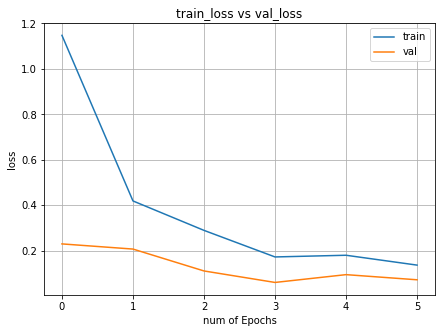

In [17]:
# train loss vs validation loss

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

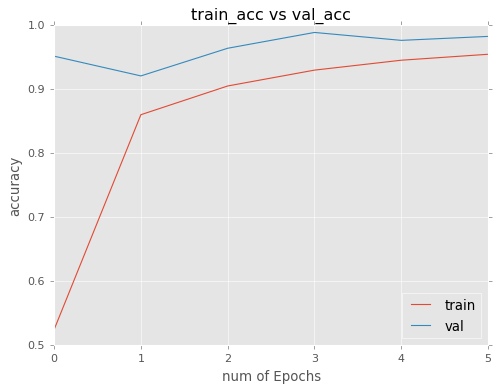

In [20]:
# train accuracy vs validation accuracy

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])